In [3]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
import pandas as pd
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]

rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.items() if 'size' in x}
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=16
fontother=12

In [4]:
bck_energy_file = np.loadtxt('sim0_energy_1e-05_278_first.csv', skiprows=1)
res_cols = {v: x for x, v in enumerate(open('sim0_energy_1e-05_278_first.csv', 'r').readline().split())}

In [6]:
sorted(res_cols.items(), key=lambda x: x[1])
res_cols['Epot'] = range(7, 32)
res_cols['bonds'] = range(12, 17)
res_cols['LJ'] = [22, 31]
res_cols['angles'] = range(7, 12)
res_cols['dihedrals'] = range(18, 22)

In [7]:
ref_energy_file = np.loadtxt('sim0_energy_0.0_7445.csv', skiprows=1)

In [8]:
ref_energy_file

array([[  0.00000000e+00,   0.00000000e+00,   3.01699000e-32, ...,
          3.46873000e+00,   5.47697000e+00,   5.62556000e+01],
       [  5.00000000e+02,   5.00000000e-01,   3.52105000e+00, ...,
          5.51614000e-01,   8.52830000e+00,   6.35297000e+01],
       [  1.00000000e+03,   1.00000000e+00,   3.58231000e+00, ...,
          1.16184000e+00,   8.81643000e+00,   5.27396000e+01],
       ..., 
       [  1.19000000e+05,   1.19000000e+02,   3.47161000e+00, ...,
          4.39415000e+00,   4.09847000e+00,   6.55562000e+01],
       [  1.19500000e+05,   1.19500000e+02,   3.50956000e+00, ...,
          4.32594000e+00,   5.16038000e+00,   4.41823000e+01],
       [  1.20000000e+05,   1.20000000e+02,   3.44716000e+00, ...,
          2.79472000e+00,   4.14898000e+00,   5.77574000e+01]])

In [11]:
ref_cols = {v: x for x, v in enumerate(open('sim0_energy_0.0_7445.csv', 'r').readline().split())}
print(sorted(ref_cols.items(), key=lambda x: x[1]))
ref_cols['Epot'] = range(4, 18)
ref_cols['LJ'] = (12, )
ref_cols['bonds'] = (7, 8)
ref_cols['angles'] = (5, 6)
ref_cols['dihedrals'] = (10, 11)

[('step', 0), ('time', 1), ('T', 2), ('Ekin', 3), ('angle_12', 4), ('angle_160', 5), ('angle_166', 6), ('bond_71', 7), ('bond_82', 8), ('coulomb', 9), ('dihedral_51', 10), ('dihedral_83', 11), ('lj', 12), ('lj-14_0', 13), ('lj-14_1', 14), ('lj-14_2', 15), ('lj-14_3', 16), ('lj-14_4', 17)]


In [14]:
RT = 8.314 * 423.0 * 10**-3
print(RT)
NRT = RT*75*302.0
print(NRT)
%matplotlib inline

3.5168220000000003
79656.01830000001


# Potential energy

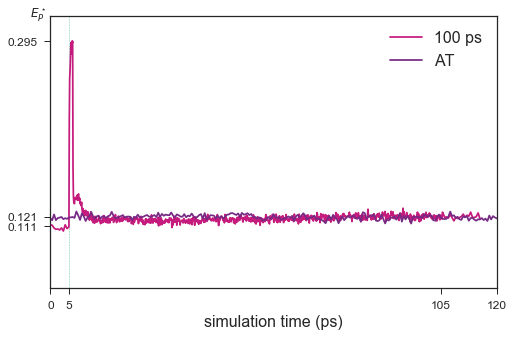

In [53]:
# Potential energy
rcParams['figure.figsize'] =  8, 5

plt.annotate(r'$E_P^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right', fontsize=12)
yticks = [
    np.average(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1))/NRT,
    np.average(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)[:5])/NRT,
    np.max(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1))/NRT
    ]
plt.axvline(x=5.0, linewidth=0.5, linestyle='--')
plt.plot(bck_energy_file[:, res_cols['time']], (np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)/NRT),
         color=plot_colors[res2color[0.00001]], label='100 ps')
plt.plot(ref_energy_file[:, ref_cols['time']], np.sum(ref_energy_file[:, ref_cols['Epot']], axis=1)/NRT,
         color=plot_colors[res2color['aa']], label='AT')
plt.xlabel('simulation time (ps)')
plt.yticks(yticks, map(r'{:.3f}'.format, yticks))
plt.xticks([0, 5, 105, 120])
plt.ylim([0.05, 0.32])
plt.xlim([0, 120])
plt.legend()
plt.savefig('pe10_energy.pdf', dpi=300, bbox_inches='tight')

In [10]:
avg_ref_epot = np.average(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1))/NRT
std_ref_epot = np.std(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)/NRT)
print avg_ref_epot, std_ref_epot
avg_res_epot = np.average(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)[1012:])/NRT
std_res_epot = np.std(np.sum(bck_energy_file[:, res_cols['Epot']], axis=1)[1012:]/NRT)
print avg_res_epot, std_res_epot

0.120609035865 0.0161228485511
0.120782128763 0.0021850283663


In [11]:
bck_energy_file[:, res_cols['time']][1012:].shape

(26,)

## GMX long simulations

In [12]:
gmx_ref_energy = np.loadtxt('ref_energy.xvg', comments=('#','@'))
gmx_res_energy = np.loadtxt('res_energy.xvg', comments=('#','@'))
gmx_res_energy2 = np.loadtxt('res_energy2.xvg', comments=('#','@'))

In [13]:
gmx_cols = """
@ s0 legend "Bond"
@ s1 legend "Angle"
@ s2 legend "Ryckaert-Bell."
@ s3 legend "LJ-14"
@ s4 legend "Coulomb-14"
@ s5 legend "LJ (SR)"
@ s6 legend "Coulomb (SR)"
@ s7 legend "Potential"
@ s8 legend "Total Energy"
""".replace('@ s', '').replace(' legend', '').replace('"', '').split()

(220000, 240000)

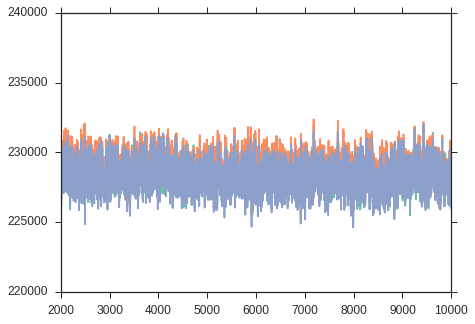

In [14]:
plt.plot(gmx_ref_energy[:, 0], gmx_ref_energy[:, 9])
plt.plot(gmx_res_energy[:, 0], gmx_res_energy[:, 9])
plt.plot(gmx_res_energy[:, 0], gmx_res_energy2[:, 9])
plt.xlim([2000, 10000])
plt.ylim([220000, 240000])

## Supportive information

### non-bonded

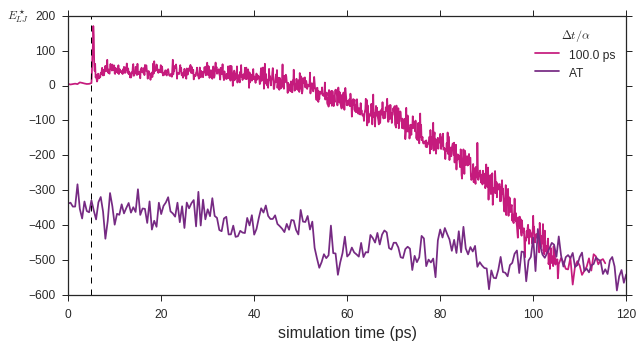

In [15]:
rcParams['figure.figsize'] = 10, 5

# LJ
yticks = []
max_y = 0.0
plt.annotate(r'$E_{LJ}^\star$', 
             xy=(-0.07, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')

data = np.sum(bck_energy_file[:, res_cols['LJ']], axis=1)
plt.plot(
    bck_energy_file[:,0]*dt, 
    data, 
    color=plot_colors[res2color[0.00001]],
    label='{} ps'.format(dt/0.00001))
yticks.append(max(max_y, np.nanmax(data)))

ref_data_lj = np.sum(ref_energy_file[:, ref_cols['LJ']], axis=1)+170.0

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_energy_file[:, 0]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
#plt.yticks(yticks, map('{:.2f}'.format, yticks))
#plt.xlim(xmax=160)
#plt.ylim([-6, 1])
#plt.xticks([0.0, 5.0, 5.0+dt/0.00001, 5+dt/0.00002])
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, frameon=False,
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe10_lj_change.pdf', dpi=300, bbox_inches='tight')

### bonds

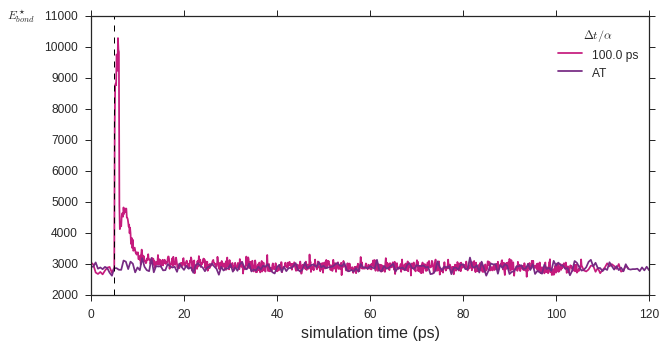

In [16]:
rcParams['figure.figsize'] = 10, 5

# LJ
yticks = []
max_y = 0.0
plt.annotate(r'$E_{bond}^\star$', 
             xy=(-0.1, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')

data = np.sum(bck_energy_file[:, res_cols['bonds']], axis=1)
plt.plot(
    bck_energy_file[:,0]*dt, 
    data, 
    color=plot_colors[res2color[0.00001]],
    label='{} ps'.format(dt/0.00001))
yticks.append(max(max_y, np.nanmax(data)))

ref_data_lj = np.sum(ref_energy_file[:, ref_cols['bonds']], axis=1)

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_energy_file[:, 0]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, frameon=False,
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe10_bond_change.pdf', dpi=300, bbox_inches='tight')

### angles

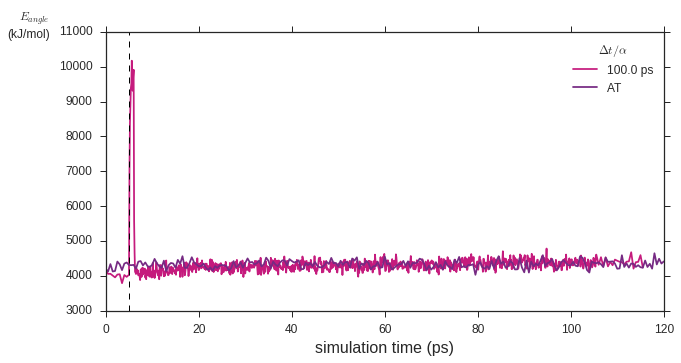

In [17]:
rcParams['figure.figsize'] = 10, 5

# LJ
yticks = []
max_y = 0.0
plt.annotate(r'$E_{angle}$' + '\n(kJ/mol)', 
             xy=(-0.1, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')

data = np.sum(bck_energy_file[:, res_cols['angles']], axis=1)
plt.plot(
    bck_energy_file[:,0]*dt, 
    data, 
    color=plot_colors[res2color[0.00001]],
    label='{} ps'.format(dt/0.00001))
yticks.append(max(max_y, np.nanmax(data)))

ref_data_lj = np.sum(ref_energy_file[:, ref_cols['angles']], axis=1)+600

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_energy_file[:, 0]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, frameon=False,
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe10_angle_change.pdf', dpi=300, bbox_inches='tight')

### dihedrals

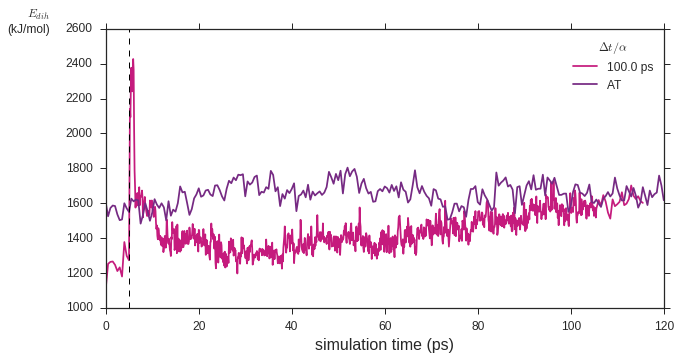

In [18]:
rcParams['figure.figsize'] = 10, 5

# LJ
yticks = []
max_y = 0.0
plt.annotate(r'$E_{dih}$' + '\n(kJ/mol)', 
             xy=(-0.1, 0.99), 
             xycoords='axes fraction', 
             horizontalalignment='right')

data = np.sum(bck_energy_file[:, res_cols['dihedrals']], axis=1)
plt.plot(
    bck_energy_file[:,0]*dt, 
    data, 
    color=plot_colors[res2color[0.00001]],
    label='{} ps'.format(dt/0.00001))
yticks.append(max(max_y, np.nanmax(data)))

ref_data_lj = np.sum(ref_energy_file[:, ref_cols['dihedrals']], axis=1)

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_energy_file[:, 0]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=5.0, linestyle='--', linewidth=1.0, color='k')
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, frameon=False,
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe10_dih_change.pdf', dpi=300, bbox_inches='tight')

### CG IBI

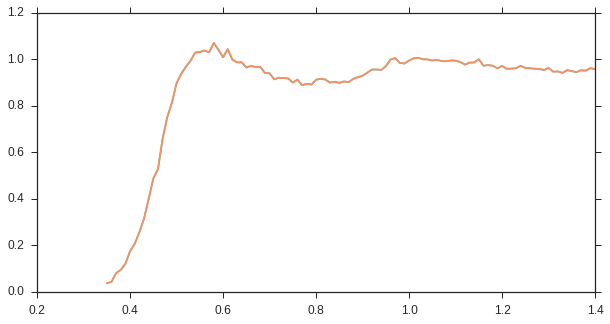

In [19]:
res_rdf1 = np.loadtxt('cg_ibi/A-A.dist.new', usecols=(0, 1))
ref_rdf = np.loadtxt('cg_ibi/A-A.dist.tgt', usecols=(0, 1))
plt.plot(res_rdf1[:, 0], res_rdf1[:, 1], label='A-A step 46')
plt.plot(res_rdf1[:, 0], res_rdf1[:, 1], label='A-A step ref')

# Structural data

In [19]:
struct_files = {}
for f in os.listdir('struct'):
    try:
        struct_files[f] = np.loadtxt(os.path.join('struct/', f), usecols=(0, 1), comments=('#', '@'))
    except Exception as ex:
        print('problem with', f, ex)

In [20]:
struct_files.keys()

dict_keys(['ref_dihedral_1.xvg', 'ref_bond.hist', 'A-B.dist.new', 'angle_0.xvg', 'ch_rdf.xvg', 'ref_bond_c_h.xvg', 'ref_angle_0.xvg', 'ref_bond_c_c.xvg', 'ref_angle_1.xvg', 'angle_1.xvg', 'ref_cc_rdf.xvg', 'ref_dihedral.hist', 'ref_B-B.dist.new', 'ref_dihedral_0.xvg', 'res_bond_c_c.xvg', 'ref_A-A.dist.new', 'ref_ch_rdf.xvg', 'cc_rdf.xvg', 'angle.hist', 'res_bond_c_h.xvg', 'ref_angle_2.xvg', 'angle_2.xvg', 'bond.hist', 'B-B.dist.new', 'dihedral_0.xvg', 'ref_angle.hist', 'dihedral.hist', 'A-A.dist.new', 'ref_A-B.dist.new', 'dihedral_1.xvg'])

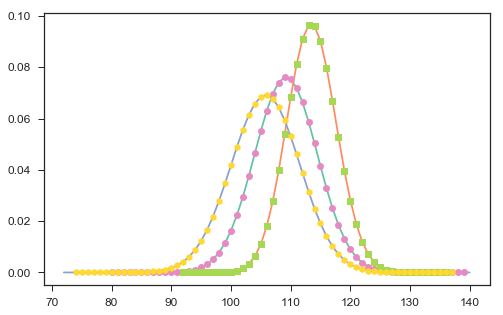

In [21]:
plt.plot(struct_files['angle_0.xvg'][:, 0], struct_files['angle_0.xvg'][:, 1])
plt.plot(struct_files['angle_1.xvg'][:, 0], struct_files['angle_1.xvg'][:, 1])
plt.plot(struct_files['angle_2.xvg'][:, 0], struct_files['angle_2.xvg'][:, 1])
plt.plot(struct_files['ref_angle_0.xvg'][:, 0], struct_files['ref_angle_0.xvg'][:, 1], 'o')
plt.plot(struct_files['ref_angle_1.xvg'][:, 0], struct_files['ref_angle_1.xvg'][:, 1], 's')
plt.plot(struct_files['ref_angle_2.xvg'][:, 0], struct_files['ref_angle_2.xvg'][:, 1], 'h')

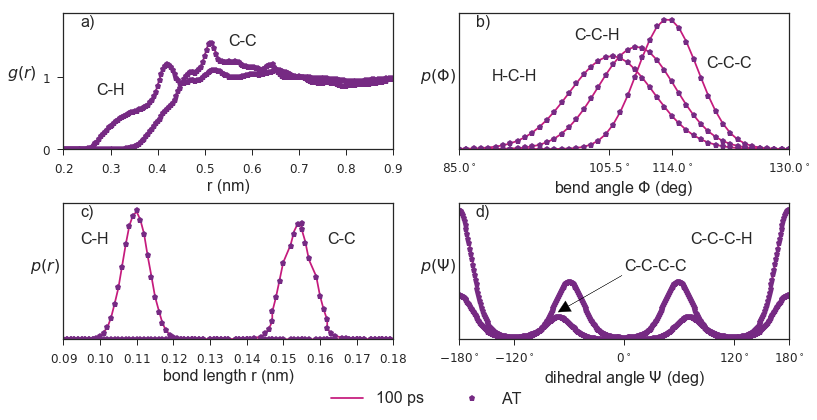

In [52]:
# Structural data
rcParams['figure.figsize'] = 13, 6
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.2, hspace=0.4)
ax1 = fig.add_subplot(gs1[0, 0]) # rdf
ax2 = fig.add_subplot(gs1[1, 0]) # bonds
ax3 = fig.add_subplot(gs1[0, 1]) # angles
ax4 = fig.add_subplot(gs1[1, 1])# dih

an_1 = ax1.annotate(r'$g(r)$', xy=(-0.08, 0.52),  
                    xycoords='axes fraction', 
                    fontsize=fonttitle, 
                    horizontalalignment='right')
an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax1.plot(struct_files['cc_rdf.xvg'][:, 0], 
         struct_files['cc_rdf.xvg'][:, 1], 
         color=plot_colors[res2color[0.00001]])
ax1.plot(struct_files['ref_cc_rdf.xvg'][:, 0], 
         struct_files['ref_cc_rdf.xvg'][:, 1], 
         'p', color=plot_colors[res2color['aa']], markevery=2)

ax1.annotate('C-C', xy=(0.5, 0.76), xycoords='axes fraction', fontsize=fonttitle)

ax1.plot(struct_files['ch_rdf.xvg'][:, 0], 
         struct_files['ch_rdf.xvg'][:, 1], 
         color=plot_colors[res2color[0.00001]])
ax1.plot(struct_files['ref_ch_rdf.xvg'][:, 0], 
         struct_files['ref_ch_rdf.xvg'][:, 1], 
         'p', color=plot_colors[res2color['aa']], markevery=2)

ax1.annotate('C-H', xy=(0.1, 0.4), xycoords='axes fraction', fontsize=fonttitle)

ax1.tick_params(axis='both', which='major')
ax1.set_yticks([0.0, 1.0])
#ax1.set_xticks([0.32, 0.5, 1.2])
ax1.set_xlim([0.2, 0.9])
ax1.set_ylim([0.0, 1.9])
ax1.set_xticklabels(map(r'${:.1f}$'.format, ax1.get_xticks()))
ax1.set_yticklabels(map(r'${:.0f}$'.format, ax1.get_yticks()))
ax1.set_xlabel(r'r (nm)')

# Bonds
an_2 = ax2.annotate(r'$p(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, 
                    horizontalalignment='right')
an_21 = ax2.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(struct_files['res_bond_c_c.xvg'][:, 0], struct_files['res_bond_c_c.xvg'][:, 1],
         color=plot_colors[res2color[0.00001]])
ax2.plot(struct_files['ref_bond_c_c.xvg'][:, 0], struct_files['ref_bond_c_c.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax2.annotate('C-C', xy=(0.8, 0.7), xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(struct_files['res_bond_c_h.xvg'][:, 0], struct_files['res_bond_c_h.xvg'][:, 1],
         color=plot_colors[res2color[0.00001]])
ax2.plot(struct_files['ref_bond_c_h.xvg'][:, 0], struct_files['ref_bond_c_h.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax2.annotate('C-H', xy=(0.05, 0.7), xycoords='axes fraction', fontsize=fonttitle)
ax2.set_xlim(0.09, 0.18)
ax2.set_ylim(ymin=0)
ax2.tick_params(axis='both', which='major')
ax2.set_yticks([])
ax2.set_xlabel(r'bond length r (nm)')
ax2.set_yticklabels(map(r'${:.0f}$'.format, ax2.get_yticks()))
ax2.set_xticklabels(map(r'${:.2f}$'.format, ax2.get_xticks()))

# Angles
an_3 = ax3.annotate(r'$p(\Phi)$', xy=(-0.01, 0.5),  
                    xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_31 = ax3.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)

ax3.plot(struct_files['angle_0.xvg'][:, 0], 
         struct_files['angle_0.xvg'][:, 1], color=plot_colors[res2color[0.00001]])
ax3.plot(struct_files['angle_1.xvg'][:, 0], 
         struct_files['angle_1.xvg'][:, 1], color=plot_colors[res2color[0.00001]])
ax3.plot(struct_files['angle_2.xvg'][:, 0],
         struct_files['angle_2.xvg'][:, 1], color=plot_colors[res2color[0.00001]])
ax3.plot(struct_files['ref_angle_0.xvg'][:, 0], 
         struct_files['ref_angle_0.xvg'][:, 1], 'p', color=plot_colors[res2color['aa']])
ax3.plot(struct_files['ref_angle_1.xvg'][:, 0], 
         struct_files['ref_angle_1.xvg'][:, 1], 'p', color=plot_colors[res2color['aa']])
ax3.plot(struct_files['ref_angle_2.xvg'][:, 0], 
         struct_files['ref_angle_2.xvg'][:, 1], 'p', color=plot_colors[res2color['aa']])
ax3.annotate('C-C-C', xy=(0.75, 0.6), xycoords='axes fraction', fontsize=fonttitle)
ax3.annotate('C-C-H', xy=(0.35, 0.8), xycoords='axes fraction', fontsize=fonttitle)
ax3.annotate('H-C-H', xy=(0.1, 0.5), xycoords='axes fraction', fontsize=fonttitle)

ax3.set_yticks([])
ax3.set_xlim([85, 130])
ax3.set_ylim(ymin=0)
ax3.set_xticks([85, 130]+[np.average(struct_files['ref_angle_1.xvg'][:, 0]),
                np.average(struct_files['ref_angle_2.xvg'][:, 0])])
# ax3.set_xticks([np.average(struct_files['ref_angle_1.xvg'][:, 0]),
#                 np.average(struct_files['ref_angle_2.xvg'][:, 0])])
ax3.tick_params(axis='both', which='major')
ax3.set_yticklabels(map(r'${}$'.format, ax3.get_yticks()))
ax3.set_xticklabels(map(r'${}^\circ$'.format, ax3.get_xticks()))
ax3.set_xlabel(r'bend angle $\Phi$ (deg)')

# Dihedral
an_4 = ax4.annotate(r'$p(\Psi)$', xy=(-0.01, 0.5),  xycoords='axes fraction', 
                    fontsize=fonttitle, horizontalalignment='right')
an_41 = ax4.annotate('d)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)

ax4.plot(struct_files['dihedral_0.xvg'][:, 0], struct_files['dihedral_0.xvg'][:, 1],
         color=plot_colors[res2color[0.00001]])
ax4.plot(struct_files['ref_dihedral_0.xvg'][:, 0], struct_files['ref_dihedral_0.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax4.annotate('C-C-C-H', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=fonttitle)
#ax4.annotate('C-C-C-C', xy=(0.2, 0.5), xycoords='axes fraction', fontsize=fonttitle)
ax4.annotate("C-C-C-C", xy=(0.3, 0.2), xytext=(0.5, 0.5), xycoords='axes fraction', 
             arrowprops=dict(facecolor='black', width=0.05), fontsize=fonttitle)
ax4.plot(struct_files['dihedral_1.xvg'][:, 0], struct_files['dihedral_1.xvg'][:, 1],
        color=plot_colors[res2color[0.00001]],
        label='{} ps'.format(int(dt/0.00001)))
ax4.plot(struct_files['ref_dihedral_1.xvg'][:, 0], struct_files['ref_dihedral_1.xvg'][:, 1], 'p',
        color=plot_colors[res2color['aa']],
        label='AT')
ax4.arrow(x=0.2, y=0.2, dx=0.25, dy=0.2)
ax4.set_yticks([])
ax4.set_xlim([-180, 180])
ax4.set_ylim(ymin=0)
ax4.set_xticks([-180, -120, 0, 120, 180])
ax4.tick_params(axis='both', which='major')
ax4.set_xticklabels(map(r'${}^\circ$'.format, ax4.get_xticks()))
ax4.set_yticklabels(map(r'${}$'.format, ax4.get_yticks()))
ax4.set_xlabel(r'dihedral angle $\Psi$ (deg)')

lgd = plt.legend(bbox_to_anchor=(-0.1, -0.6), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe10_structure.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2, an_3, an_4], bbox_inches='tight')
# plt.savefig('pe10_structure.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2, an_3, an_4], bbox_inches='tight')

# Dynamic data

In [35]:
dynamic_data = {}
for f in os.listdir('dynamic'):
    try:
        dynamic_data[f] = np.loadtxt(os.path.join('dynamic/', f), comments=('#', '@'))
    except Exception as ex:
        print('problem with', f, ex)


In [36]:
dynamic_data.keys()

dict_keys(['ref_polystat.xvg', 'res_rg.xvg', 'ref_ee.csv', 'res_acf.xvg', 'ref_acf.xvg', 'res_msd.xvg', 'ref_msd.xvg', 'res_ee.csv', 'res_polystat.xvg', 'ref_rg.xvg'])

## ACF and MSD

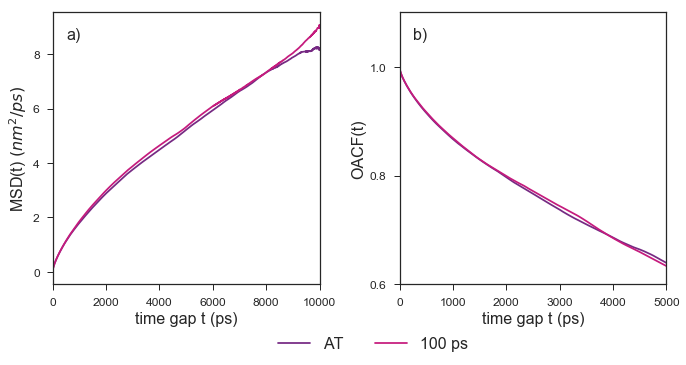

In [49]:
rcParams['figure.figsize'] = 11, 5
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

## Plot MSD
an_1 = ax1.annotate(r'a)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax1.plot(dynamic_data['ref_msd.xvg'][:, 0],
         dynamic_data['ref_msd.xvg'][:, 1], 
         label='AT', color=plot_colors[res2color['aa']])
ax1.plot(dynamic_data['res_msd.xvg'][:, 0],
         dynamic_data['res_msd.xvg'][:, 1], 
         label='100 ps', color=plot_colors[res2color[0.00001]])
# ax1.annotate(r'$D^{AT} = 0.11 \pm 0.01 \; nm^2/ns$', xy=(0.1, 0.8), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color['aa']])
# ax1.annotate(r'$D^{100ps} = 0.11 \pm \; 0.01 \; nm^2/ns$', xy=(0.1, 0.71), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color[0.00001]])
# ax1.set_yticks([0.0, 1.0, 2.0, 3.0, 4.0])
# ax1.set_yticklabels(map('{:.1f}'.format, ax1.get_yticks()))
#ax1.set_ylim([0.01, 7.0])
ax1.set_xlim([0, 10000])
ax1.set_xlabel(r'time gap t (ps)')
ax1.set_ylabel(r'MSD(t) $(nm^2 / ps)$')

## Plot ACF
an_2 = ax2.annotate(r'b)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax2.plot(dynamic_data['ref_acf.xvg'][:, 0],
         dynamic_data['ref_acf.xvg'][:, 1], 
         label='AT', color=plot_colors[res2color['aa']])
ax2.plot(dynamic_data['res_acf.xvg'][:, 0],
         dynamic_data['res_acf.xvg'][:, 1], 
         label='100 ps', color=plot_colors[res2color[0.00001]])
# ax2.annotate(r'$\tau_R^{AT} = 12.1 \; ns$', xy=(0.3, 0.8), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color['aa']])
# ax2.annotate(r'$\tau_R^{100ps} = 12 \; ns$', xy=(0.3, 0.71), xycoords='axes fraction', fontsize=fonttitle,
#             color=plot_colors[res2color[0.00001]])
ax2.set_xlabel(r'time gap t (ps)')
ax2.set_ylabel('OACF(t)')
ax2.set_xlim([0, 5000])
ax2.set_ylim([0.6, 1.1])
ax2.set_yticks([0.6, 0.8, 1.0])
lgd = ax2.legend(bbox_to_anchor=(-0.1, -0.3), ncol=2, loc='lower center', frameon=False)
plt.savefig('pe10_dynamical.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')
# plt.savefig('pe10_dynamical.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')

## RG and Re

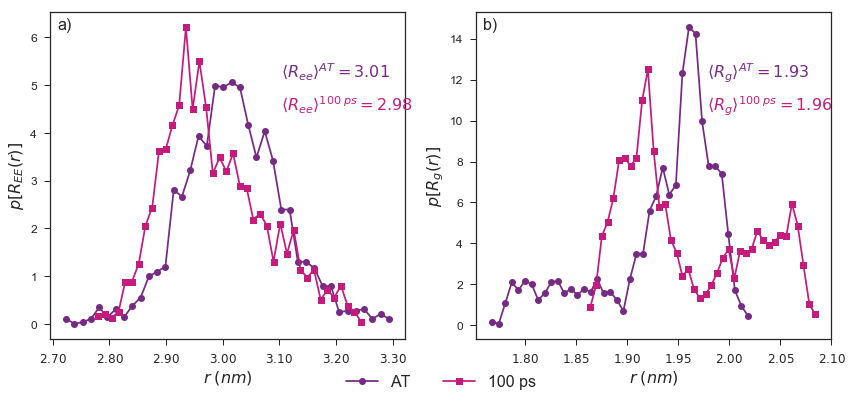

In [38]:
rcParams['figure.figsize'] = 14, 6
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.2, hspace=0.1)
ax1 = fig.add_subplot(gs1[0, 0]) # ee
ax2 = fig.add_subplot(gs1[0, 1]) # rg

# Plot E-E
an_11 = ax1.annotate('a)', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=fonttitle)
n_ref, x_ref = np.histogram(dynamic_data['ref_ee.csv'], bins=40, normed=True)
n_res, x_res = np.histogram(dynamic_data['res_ee.csv'], bins=40, normed=True)
ax1.plot(x_ref[1:], n_ref, 'o', linestyle='-', color=plot_colors[res2color['aa']], label='AT')
ax1.plot(x_res[1:], n_res, 's', linestyle='-', color=plot_colors[res2color[0.00001]], label='100 ps')
#ax1.set_xticks([5.0, 4.9] + [np.max([np.max(x_ref), np.max(x_res)]), np.min([np.min(x_ref), np.min(x_res)])])
#ax1.set_yticks([])
ax1.annotate(
    r'$\langle R_{{ee}} \rangle^{{AT}} = {:.2f}$'.format(np.average(dynamic_data['ref_ee.csv'])), 
    xy=(0.65, 0.8), 
    xycoords='axes fraction', 
    fontsize=fonttitle,
    color=plot_colors[res2color['aa']])
ax1.annotate(
    r'$\langle R_{{ee}} \rangle^{{100 \; ps}} = {:.2f}$'.format(np.average(dynamic_data['res_ee.csv'])), 
    xy=(0.65, 0.7), 
    xycoords='axes fraction', 
    fontsize=fonttitle,
    color=plot_colors[res2color[0.00001]])

ax1.set_xlabel(r'$r \; (nm)$')
ax1.set_ylabel(r'$p[R_{EE}(r)]$')
ax1.set_xticklabels(map(lambda x: r'${:.2f}$'.format(x).rstrip('0'), ax1.get_xticks()))

# Plot Rg
n_ref, x_ref = np.histogram(dynamic_data['ref_rg.xvg'][:, 2], bins=40, normed=True)
n_res, x_res = np.histogram(dynamic_data['res_rg.xvg'][:, 2], bins=40, normed=True)
ax2.plot(x_ref[1:], n_ref, 'o', linestyle='-', color=plot_colors[res2color['aa']], label='AT')
ax2.plot(x_res[1:], n_res, 's', linestyle='-', color=plot_colors[res2color[0.00001]], label='100 ps')

an_21 = ax2.annotate('b)', xy=(0.02, 0.95), xycoords='axes fraction', fontsize=fonttitle)
ax2.annotate(
    r'$\langle R_g \rangle^{{AT}} = {:.2f}$'.format(np.average(dynamic_data['ref_rg.xvg'][:, 2])), 
    xy=(0.65, 0.8), 
    xycoords='axes fraction', 
    fontsize=fonttitle,
    color=plot_colors[res2color['aa']])
ax2.annotate(
    r'$\langle R_g \rangle^{{100 \; ps}} = {:.2f}$'.format(np.average(dynamic_data['res_rg.xvg'][:, 2])), 
    xy=(0.65, 0.7), 
    xycoords='axes fraction', 
    fontsize=fonttitle,
    color=plot_colors[res2color[0.00001]])
#ax2.set_xticks([2.47] + [np.max([np.max(x_ref), np.max(x_res)]), np.min([np.min(x_ref), np.min(x_res)])])
#ax2.set_yticks([])
ax2.set_ylabel(r'$p[R_g(r)]$')
ax2.set_xlabel(r'$r \; (nm)$')
ax2.set_xticklabels(map(lambda x: r'${:.2f}$'.format(x).strip('0'), ax2.get_xticks()))

lgd = ax2.legend(bbox_to_anchor=(-0.1, -0.2), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe10_ee_rg_int.pdf', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])
plt.savefig('pe10_ee_rg_int.png', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])

In [127]:
np.average(dynamic_data['res_ee.csv']), np.std(dynamic_data['res_ee.csv'])

(2.9798634866069165, 0.090292794200467708)

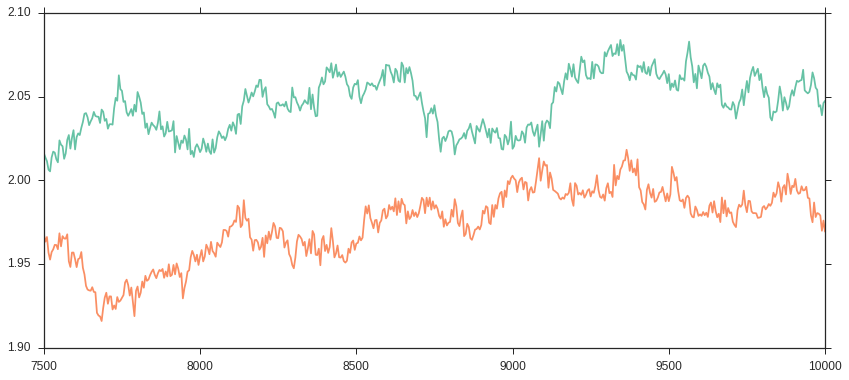

In [447]:
t = 1500
plt.plot(dynamic_data['res_rg.xvg'][:, 0][t:], dynamic_data['res_rg.xvg'][:, 2][t:])
plt.plot(dynamic_data['ref_rg.xvg'][:, 0][t:], dynamic_data['ref_rg.xvg'][:, 2][t:])

(array([  4.,  17.,  26.,  31.,  48.,  35.,  18.,  11.,  10.,   1.]),
 array([ 1.9694 ,  1.97429,  1.97918,  1.98407,  1.98896,  1.99385,
         1.99874,  2.00363,  2.00852,  2.01341,  2.0183 ]),
 <a list of 1 Patch objects>)

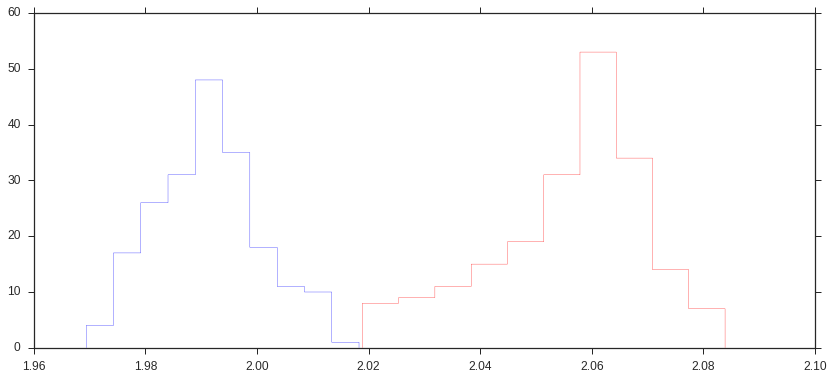

In [455]:
t = 1800
plt.hist(dynamic_data['res_rg.xvg'][:, 2][t:], histtype='step', color='r')
plt.hist(dynamic_data['ref_rg.xvg'][:, 2][t:], histtype='step', color='b')